<a href="https://colab.research.google.com/github/panaitealexandra/PMP-2024/blob/main/LAB7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercițiu laborator 7: Inferență Bayesiană cu PyMC

Un cercetător măsoară nivelul de zgomot ambiental în diferite locații dintr-un oraș. El suspectează că nivelul de zgomot, notat $X$, urmează o distribuție normală, dar atât media $\mu$, cât și deviația standard $\sigma$ sunt necunoscute. Cercetătorul are 10 observații ale nivelului de zgomot (în decibeli, dB):

\[
56, 60, 58, 55, 57, 59, 61, 56, 58, 60
\]

Scopul este să folosim inferența Bayesiană pentru a estima pe $\mu$ și pe $\sigma$.

**a)** Definiți un model în PyMC pentru această problemă.  
   Puteți alege ca distribuții a priori $\mu \sim \mathcal{N}(x, 10^2)$ și $\sigma \sim \text{HalfNormal}(10)$.
   - Cât ar trebui să fie $x$?

**b)** Inferați asupra lui $\mu$ și $\sigma$. Care este intervalul de credibilitate (HDI 95%) pentru $\mu$ și $\sigma$?


In [3]:
!pip install pymc arviz

Output()

Output()

         mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
mu     58.002  0.761    56.406     59.434      0.015    0.011    2609.0   
sigma   2.338  0.655     1.357      3.683      0.015    0.011    1977.0   

       ess_tail  r_hat  
mu       1659.0    1.0  
sigma    2210.0    1.0  


array([<Axes: title={'center': 'mu'}>, <Axes: title={'center': 'sigma'}>],
      dtype=object)

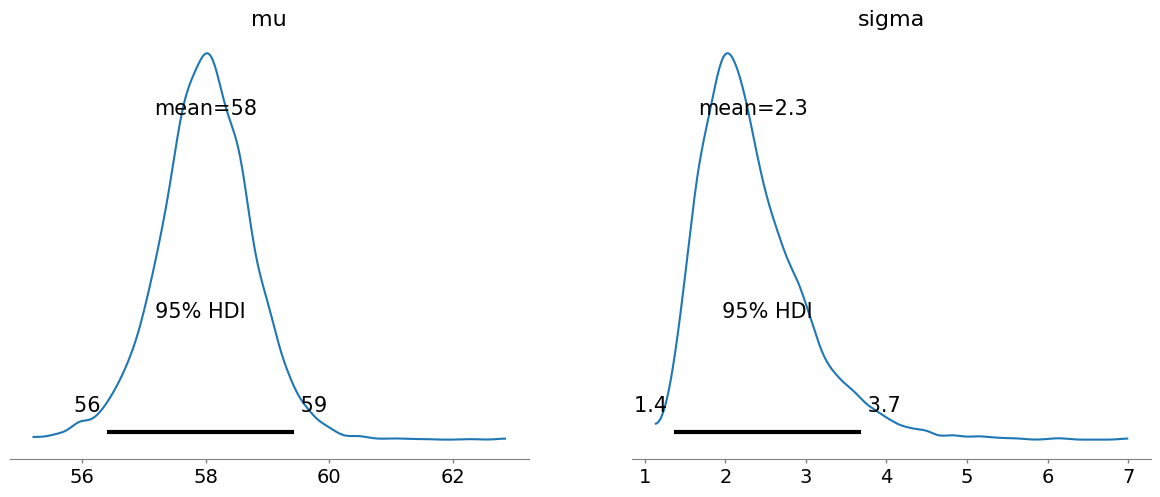

In [6]:
import pymc as pm
import numpy as np
import arviz as az

observatii = np.array([56, 60, 58, 55, 57, 59, 61, 56, 58, 60])

x = np.mean(observatii)

with pm.Model() as model:

    mu = pm.Normal("mu", mu=x, sigma=10)

    sigma = pm.HalfNormal("sigma", sigma=10)

    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=observatii)

    trace = pm.sample(2000, tune=1000, return_inferencedata=True)

print(az.summary(trace, hdi_prob=0.95))

az.plot_posterior(trace, hdi_prob=0.95)
